## HR SALARY PREDICTION DASHBOARD

### Problem statement
   The goal of the project is to predict thr salary depending upon the different factors effecting the salary

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import sys and warnings to ignore warning messages 
import sys
import warnings
%matplotlib inline

if not sys.warnoptions:
    warnings.simplefilter("ignore")


In [2]:
data=pd.read_csv('Downloads/HRDataset_v14.csv')

In [3]:
data.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [4]:
data.tail()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,4.07,4,0,2/28/2019,0,13
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513,...,Brannon Miller,12.0,Google Search,PIP,3.20,2,0,9/2/2015,5,4
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,...,Janet King,2.0,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,89292,...,Simon Roup,4.0,Employee Referral,Fully Meets,5.00,3,5,2/1/2019,0,11
310,"Zima, Colleen",10271,0,4,0,1,5,3,0,45046,...,David Stanley,14.0,LinkedIn,Fully Meets,4.50,5,0,1/30/2019,0,2


### Understanding the dataset & EDA

In [5]:
data.shape

(311, 36)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [7]:
data.describe()

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,303.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,10156.000000,0.398714,0.810289,0.434084,2.392283,4.610932,2.977492,0.093248,69020.684887,0.334405,16.845659,6555.482315,14.570957,4.110000,3.890675,1.218650,0.414791,10.237942
std,89.922189,0.490423,0.943239,0.496435,1.794383,1.083487,0.587072,0.291248,25156.636930,0.472542,6.223419,16908.396884,8.078306,0.789938,0.909241,2.349421,1.294519,5.852596
min,10001.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,45046.000000,0.000000,1.000000,1013.000000,1.000000,1.120000,1.000000,0.000000,0.000000,1.000000
25%,10078.500000,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,0.000000,55501.500000,0.000000,18.000000,1901.500000,10.000000,3.690000,3.000000,0.000000,0.000000,5.000000
50%,10156.000000,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,62810.000000,0.000000,19.000000,2132.000000,15.000000,4.280000,4.000000,0.000000,0.000000,10.000000
75%,10233.500000,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,72036.000000,1.000000,20.000000,2355.000000,19.000000,4.700000,5.000000,0.000000,0.000000,15.000000
max,10311.000000,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,250000.000000,1.000000,30.000000,98052.000000,39.000000,5.000000,5.000000,8.000000,6.000000,20.000000


In [8]:
def data_info(data):
    print('Number of Columns in the dataset: ',data.shape[1])
    print('Number of rows in the dataset: ',data.shape[0])
    print('Total number of datapoints in the dataset:',data.size)
    numerical_features = [f for f in data.columns if data[f].dtypes!='O']
    print('Count of Numerical Features:',len(numerical_features))
    cat_features = [c for c in data.columns if data[c].dtypes=='O']
    print('Count of Categorical Features:',len(cat_features))
data_info(data)

Number of Columns in the dataset:  36
Number of rows in the dataset:  311
Total number of datapoints in the dataset: 11196
Count of Numerical Features: 18
Count of Categorical Features: 18


In [9]:
#checking duplicates
data[data.duplicated()]

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences


In [10]:
for col in data.columns:
    print(col)
    print(data[col].value_counts())
    print()

Employee_Name
Adinolfi, Wilson  K    1
O'hare, Lynn           1
Patronick, Lucas       1
Panjwani, Nina         1
Ozark, Travis          1
                      ..
Gerke, Melisa          1
Gentry, Mildred        1
Gaul, Barbara          1
Garcia, Raul           1
Zima, Colleen          1
Name: Employee_Name, Length: 311, dtype: int64

EmpID
10026    1
10303    1
10005    1
10148    1
10041    1
        ..
10122    1
10159    1
10257    1
10111    1
10271    1
Name: EmpID, Length: 311, dtype: int64

MarriedID
0    187
1    124
Name: MarriedID, dtype: int64

MaritalStatusID
0    137
1    124
2     30
3     12
4      8
Name: MaritalStatusID, dtype: int64

GenderID
0    176
1    135
Name: GenderID, dtype: int64

EmpStatusID
1    184
5     88
3     14
4     14
2     11
Name: EmpStatusID, dtype: int64

DeptID
5    208
3     50
6     32
4     10
1     10
2      1
Name: DeptID, dtype: int64

PerfScoreID
3    243
4     37
2     18
1     13
Name: PerfScoreID, dtype: int64

FromDiversityJobFairID

###   Data cleaning

In [11]:
#creating a Dataframe from the given dataset
df = pd.DataFrame(data)
df.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences'],
      dtype='object')

In [12]:
df.isna().sum()

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

In [13]:
##Observation:
#DateofTermination has 207 null values . That means those are currently employed. Keep the column for now and we will use it for experience calculation.
#ManagerID has 8 null values. This column doesn't have any significance in our salary prediction. So keep it as it is now and will be excepted during sala

In [14]:
# we convert DOB,DateofHire ,DateofTermination, DateofTermination and LastPerformanceReview_Date into proper date format.
df[['DOB','DateofHire' ,'DateofTermination','LastPerformanceReview_Date']].head()

,DOB,DateofHire,DateofTermination,LastPerformanceReview_Date
0,7/10/1983,7/5/2011,NaN,1/17/2019
1,5/5/1975,3/30/2015,6/16/2016,2/24/2016
2,9/19/1988,7/5/2011,9/24/2012,5/15/2012
3,9/27/1988,1/7/2008,NaN,1/3/2019
4,9/8/1989,7/11/2011,9/6/2016,2/1/2016


In [15]:
# covert these columns to datetime format.
df['DOB']=pd.to_datetime(df['DOB'])
df['DateofHire']=pd.to_datetime(df['DateofHire'])
df['DateofTermination']=pd.to_datetime(df['DateofTermination'])
df['LastPerformanceReview_Date']=pd.to_datetime(df['LastPerformanceReview_Date'])



In [16]:
df[['DOB','DateofHire' ,'DateofTermination','LastPerformanceReview_Date']].head()

,DOB,DateofHire,DateofTermination,LastPerformanceReview_Date
0,1983-07-10,2011-07-05,NaT,2019-01-17
1,1975-05-05,2015-03-30,2016-06-16,2016-02-24
2,1988-09-19,2011-07-05,2012-09-24,2012-05-15
3,1988-09-27,2008-01-07,NaT,2019-01-03
4,1989-09-08,2011-07-11,2016-09-06,2016-02-01


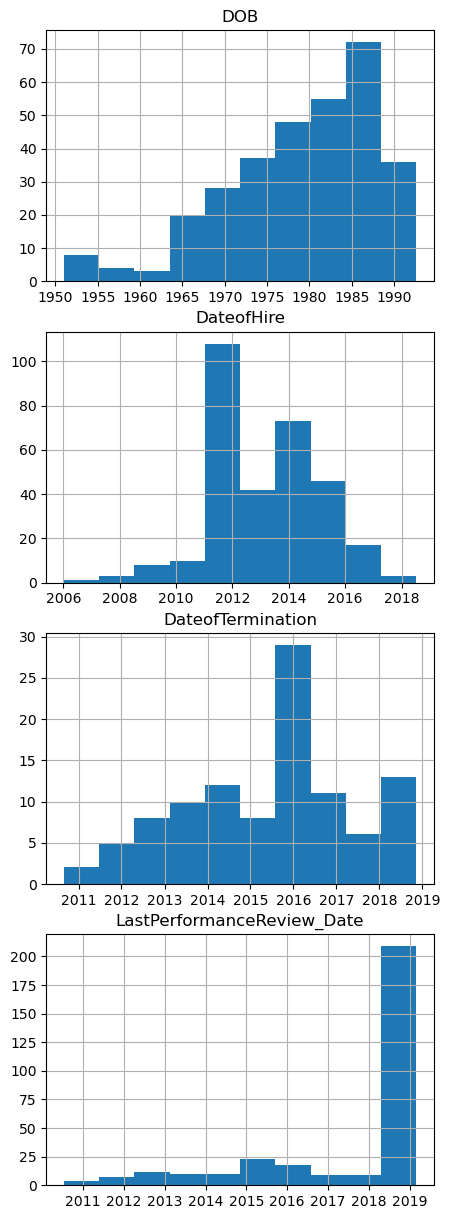

In [17]:
# check the histogram of these features
plt.figure(figsize=(5,15))
plt.subplot(4,1,1)
df['DOB'].hist();
plt.title('DOB')

plt.subplot(4,1,2)
df['DateofHire'].hist();
plt.title('DateofHire')

plt.subplot(4,1,3)
df['DateofTermination'].hist();
plt.title('DateofTermination')

plt.subplot(4,1,4)
df['LastPerformanceReview_Date'].hist();
plt.title('LastPerformanceReview_Date');

In [18]:
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,2019-01-17,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2016-02-24,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,2012-05-15,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,2019-01-03,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2016-02-01,0,2


## Handiling outliers

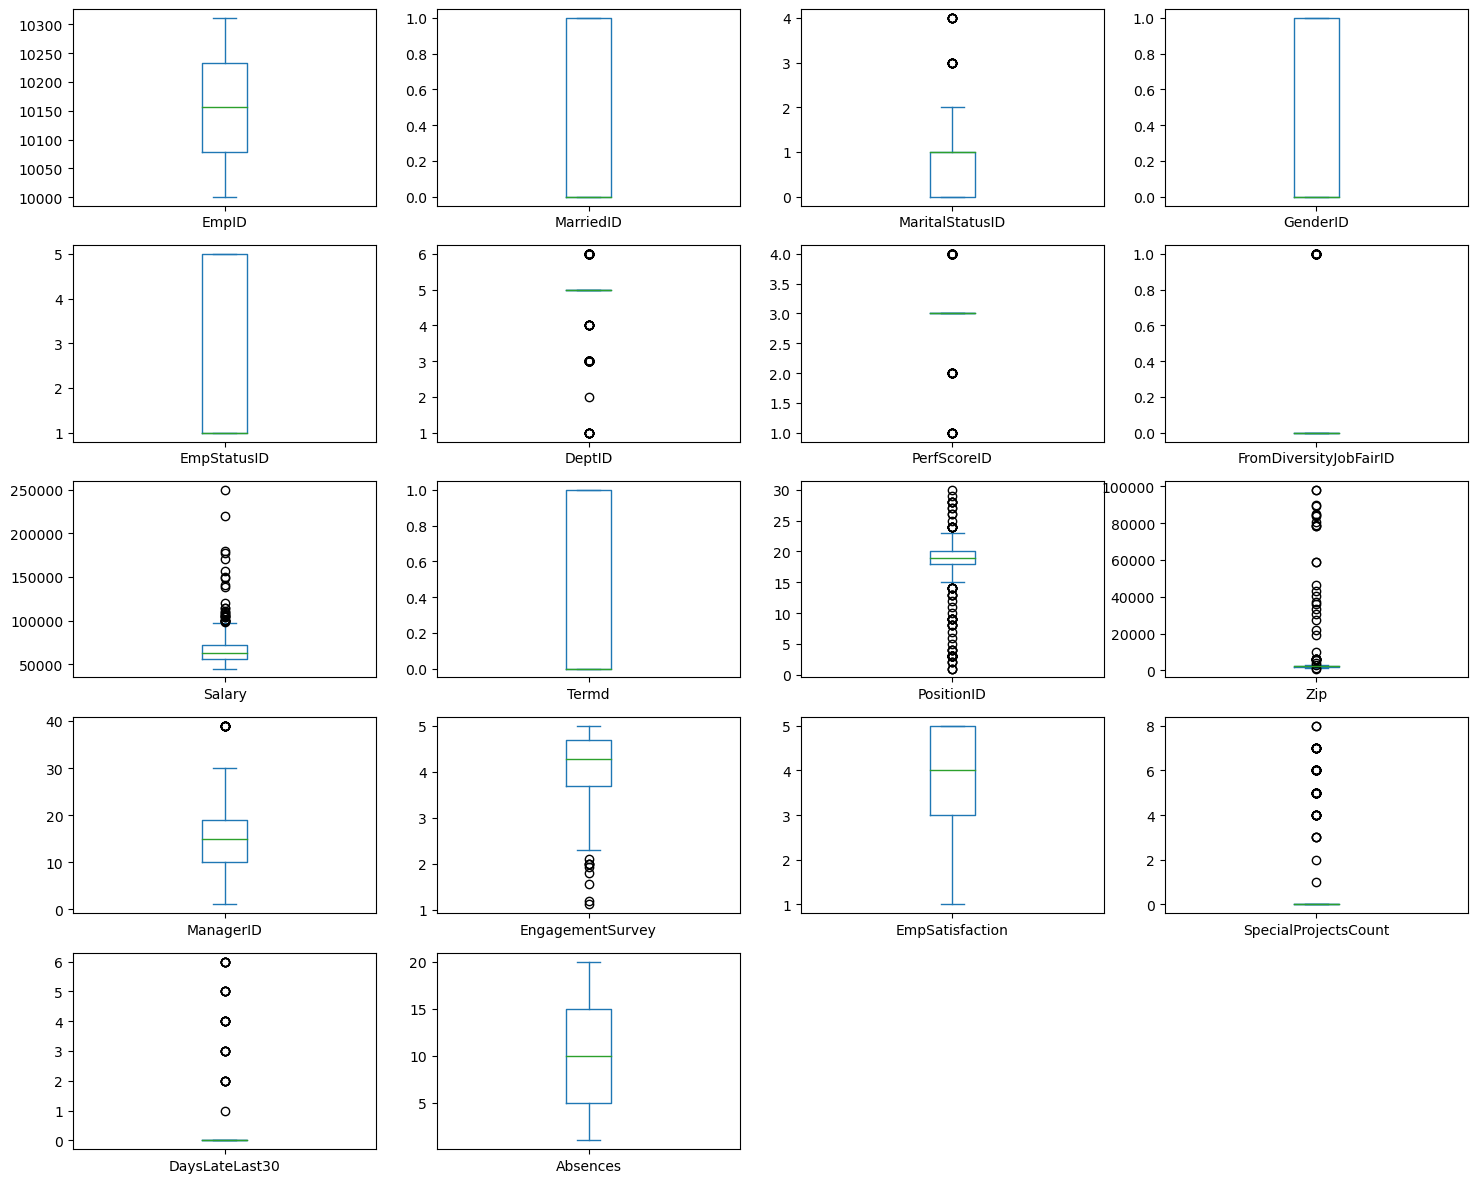

In [19]:
df.plot(kind='box',subplots=True,layout=(8,4),figsize=(18,24));

In [20]:
# visualize the target variable salary

Text(0.5, 1.0, 'Distribution plot')

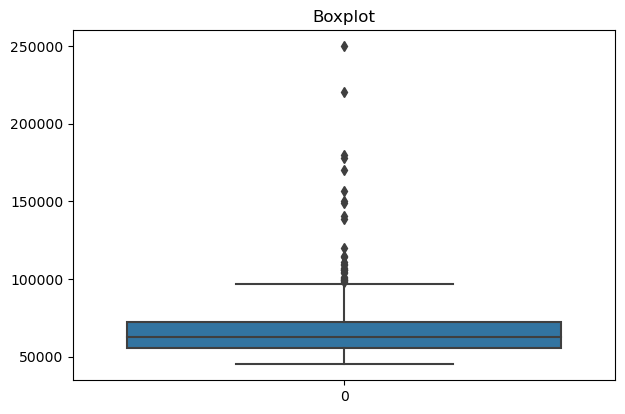

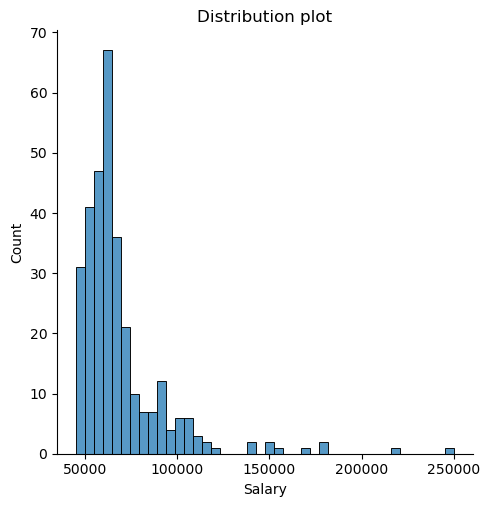

In [21]:
plt.figure(figsize=(7,10))
plt.subplot(2,1,1)
sns.boxplot(df.Salary)
plt.title('Boxplot')
sns.displot(df.Salary)
plt.title('Distribution plot')



In [22]:
# checking outliers in salary column
Q1=np.percentile(df['Salary'],25,interpolation ='midpoint')
Q2=np.percentile(df['Salary'],50,interpolation='midpoint')
Q3=np.percentile(df['Salary'],75,interpolation='midpoint')

print( "",'Q1:',Q1,'\n','Q2:',Q2,'\n','Q3:',Q3)

 Q1: 55501.5 
 Q2: 62810.0 
 Q3: 72036.0


In [23]:
IQR=Q3-Q1
print('IQR',IQR)
# calculating upper and lower limits
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print('lower limir:',low_lim)
print('upper limit:',up_lim)

IQR 16534.5
lower limir: 30699.75
upper limit: 96837.75


In [24]:
outlier=[]
for x in  data['Salary']:
    if ((x>up_lim) or (x<low_lim)):
        outlier.append(x)

In [25]:
outlier

[104437,
 110000,
 103613,
 106367,
 100031,
 110929,
 170500,
 101199,
 138888,
 99280,
 178000,
 99351,
 114800,
 99020,
 97999,
 180000,
 105700,
 250000,
 105688,
 157000,
 108987,
 120000,
 150290,
 140920,
 148999,
 100416,
 113999,
 107226,
 220450]

## Data visualization

In [26]:
data['FromDiversityJobFairID'].value_counts()

0    282
1     29
Name: FromDiversityJobFairID, dtype: int64

In [27]:
df['HispanicLatino'].unique()

array(['No', 'Yes', 'no', 'yes'], dtype=object)

In [28]:
df['HispanicLatino']=df['HispanicLatino'].replace({'yes': 'Yes','no':'No'})

In [29]:
df['HispanicLatino'].unique()

array(['No', 'Yes'], dtype=object)

In [30]:
data.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences'],
      dtype='object')

In [31]:
col = ['FromDiversityJobFairID','Termd', 'State','Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
        'EmploymentStatus','Department', 'RecruitmentSource','PerformanceScore', 'EmpSatisfaction','SpecialProjectsCount',
       'Absences']

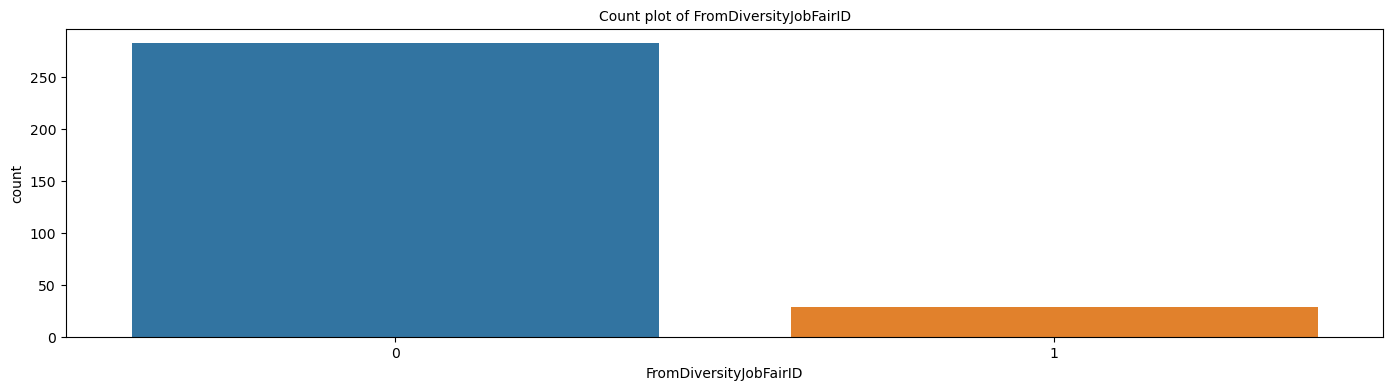

0    90.675241
1     9.324759
Name: FromDiversityJobFairID, dtype: float64


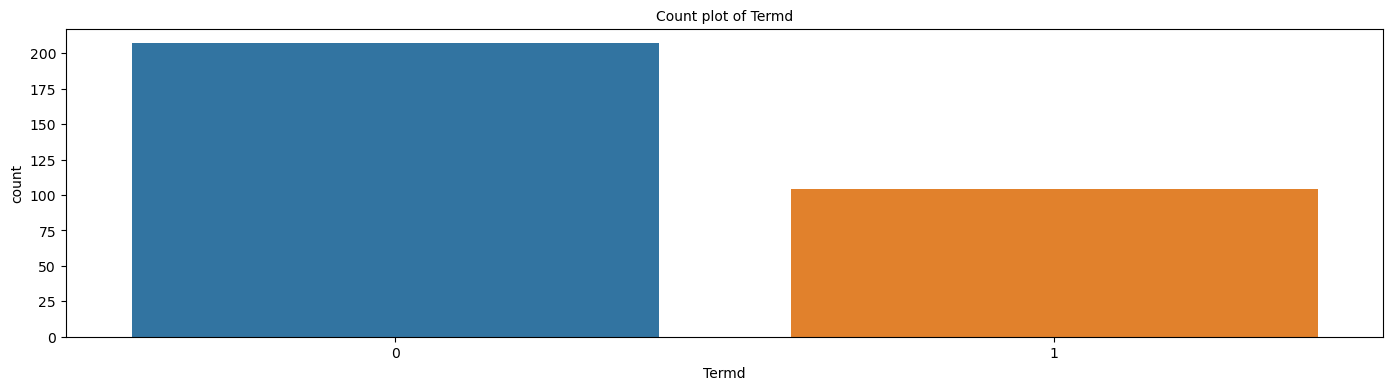

0    66.559486
1    33.440514
Name: Termd, dtype: float64


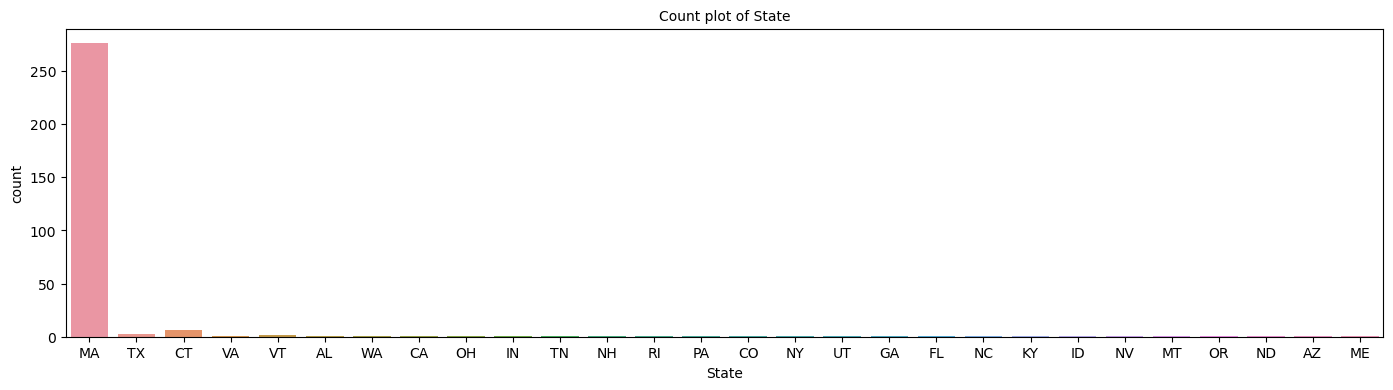

MA    88.745981
CT     1.929260
TX     0.964630
VT     0.643087
UT     0.321543
AZ     0.321543
ND     0.321543
OR     0.321543
MT     0.321543
NV     0.321543
ID     0.321543
KY     0.321543
NC     0.321543
FL     0.321543
GA     0.321543
CO     0.321543
NY     0.321543
PA     0.321543
RI     0.321543
NH     0.321543
TN     0.321543
IN     0.321543
OH     0.321543
CA     0.321543
WA     0.321543
AL     0.321543
VA     0.321543
ME     0.321543
Name: State, dtype: float64


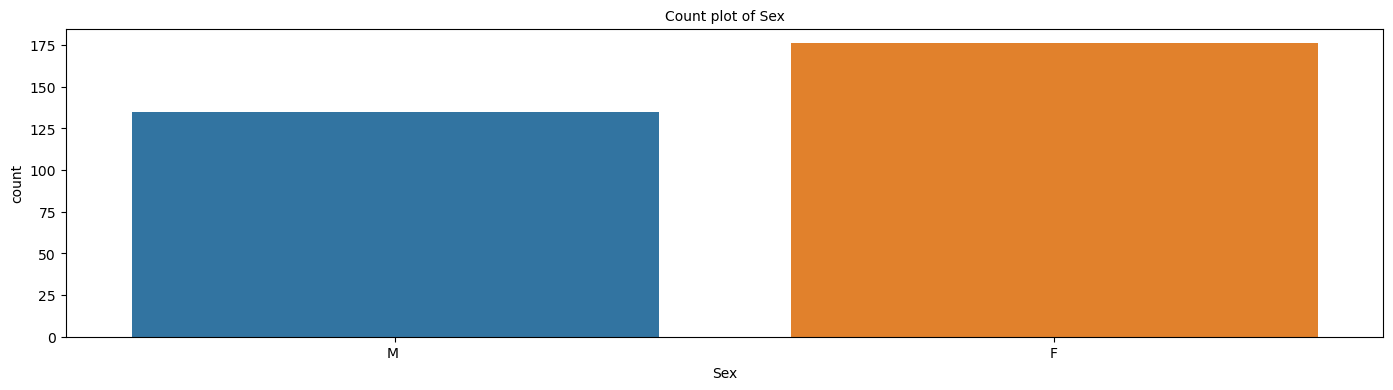

F     56.59164
M     43.40836
Name: Sex, dtype: float64


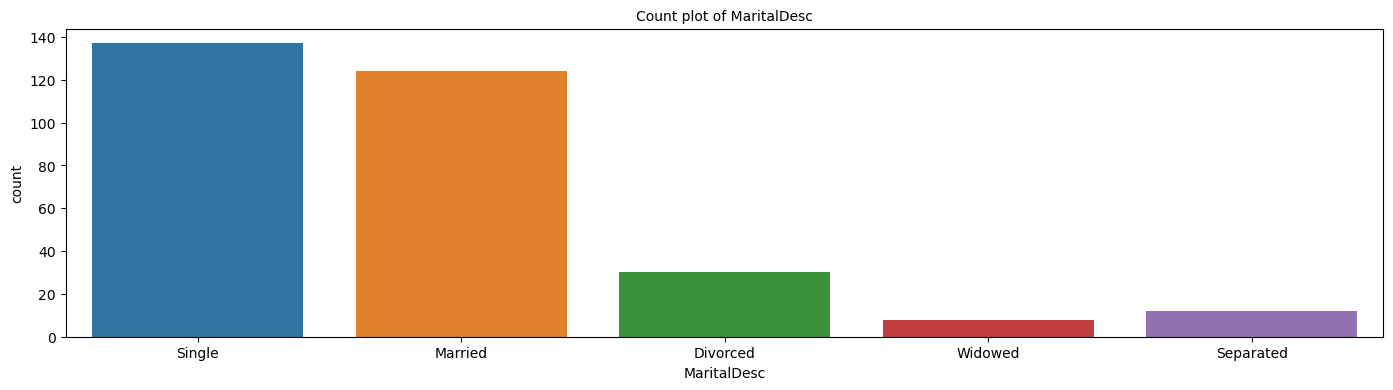

Single       44.051447
Married      39.871383
Divorced      9.646302
Separated     3.858521
Widowed       2.572347
Name: MaritalDesc, dtype: float64


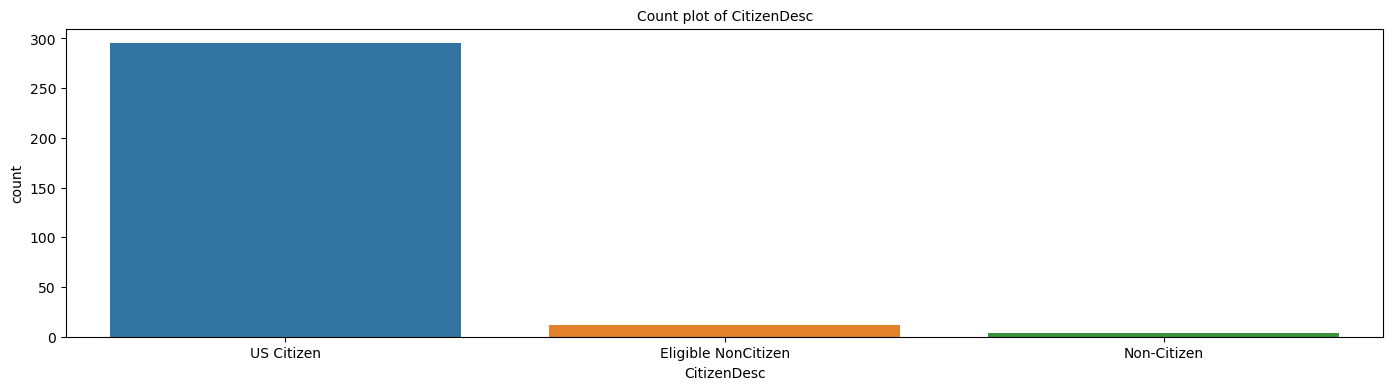

US Citizen             94.855305
Eligible NonCitizen     3.858521
Non-Citizen             1.286174
Name: CitizenDesc, dtype: float64


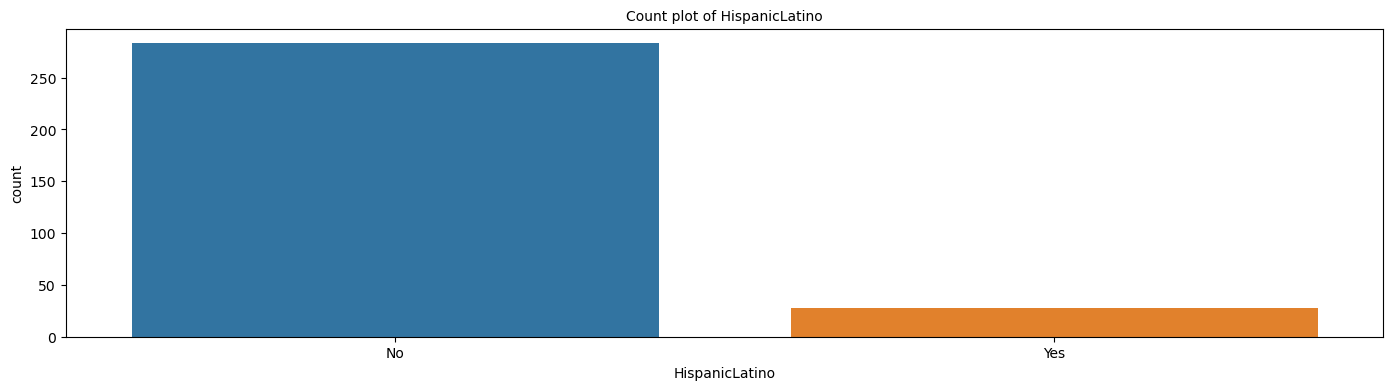

No     90.996785
Yes     9.003215
Name: HispanicLatino, dtype: float64


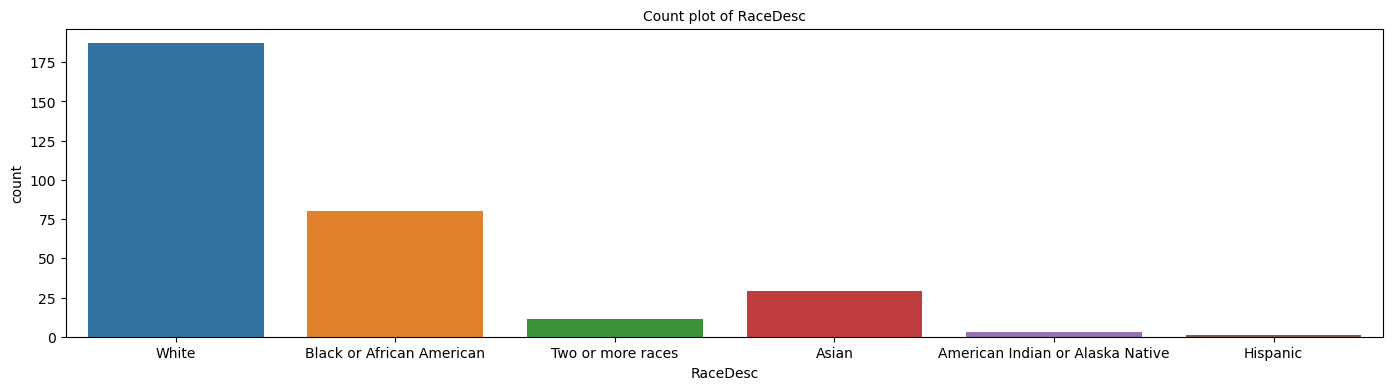

White                               60.128617
Black or African American           25.723473
Asian                                9.324759
Two or more races                    3.536977
American Indian or Alaska Native     0.964630
Hispanic                             0.321543
Name: RaceDesc, dtype: float64


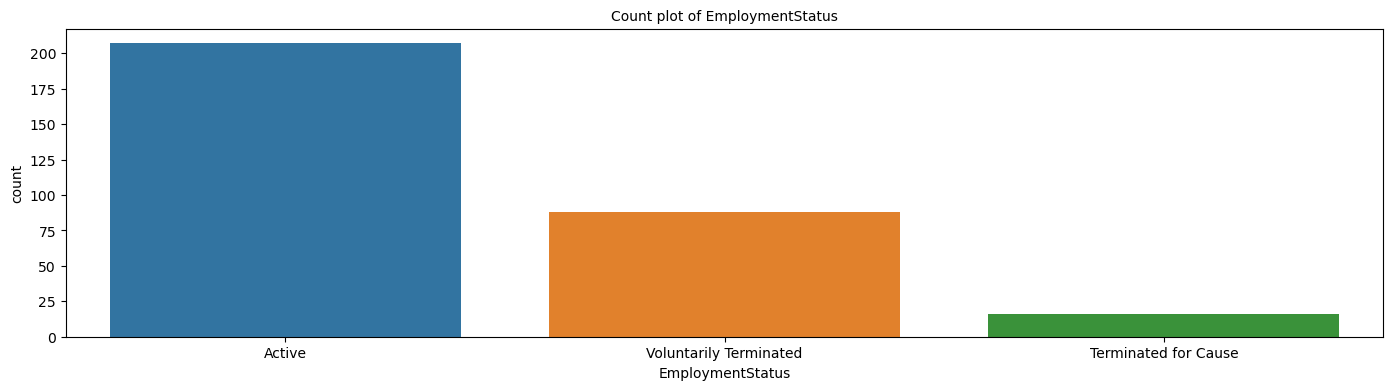

Active                    66.559486
Voluntarily Terminated    28.295820
Terminated for Cause       5.144695
Name: EmploymentStatus, dtype: float64


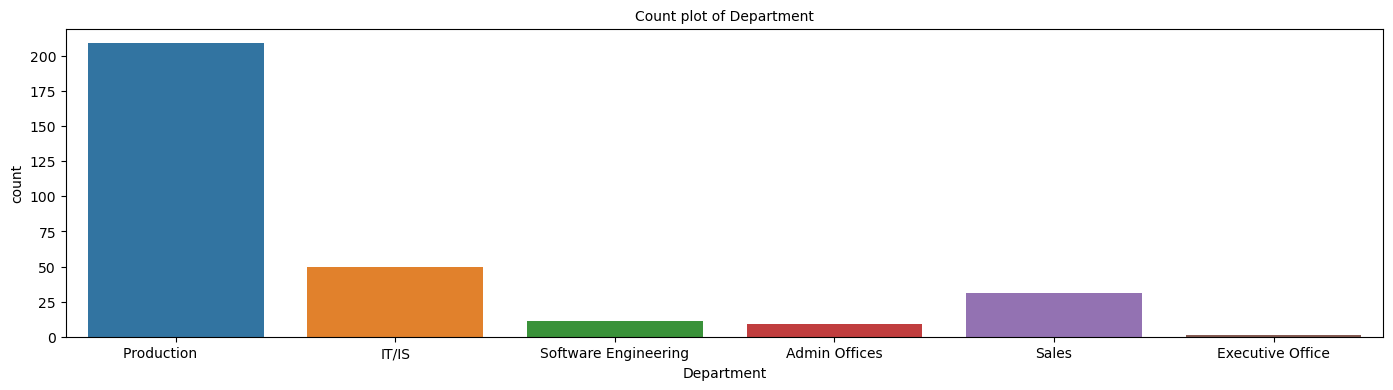

Production              67.202572
IT/IS                   16.077170
Sales                    9.967846
Software Engineering     3.536977
Admin Offices            2.893891
Executive Office         0.321543
Name: Department, dtype: float64


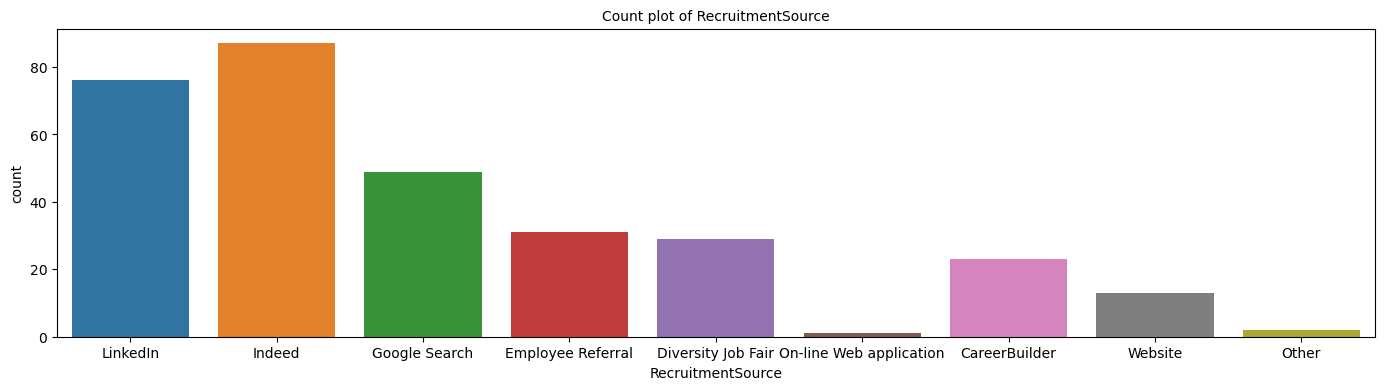

Indeed                     27.974277
LinkedIn                   24.437299
Google Search              15.755627
Employee Referral           9.967846
Diversity Job Fair          9.324759
CareerBuilder               7.395498
Website                     4.180064
Other                       0.643087
On-line Web application     0.321543
Name: RecruitmentSource, dtype: float64


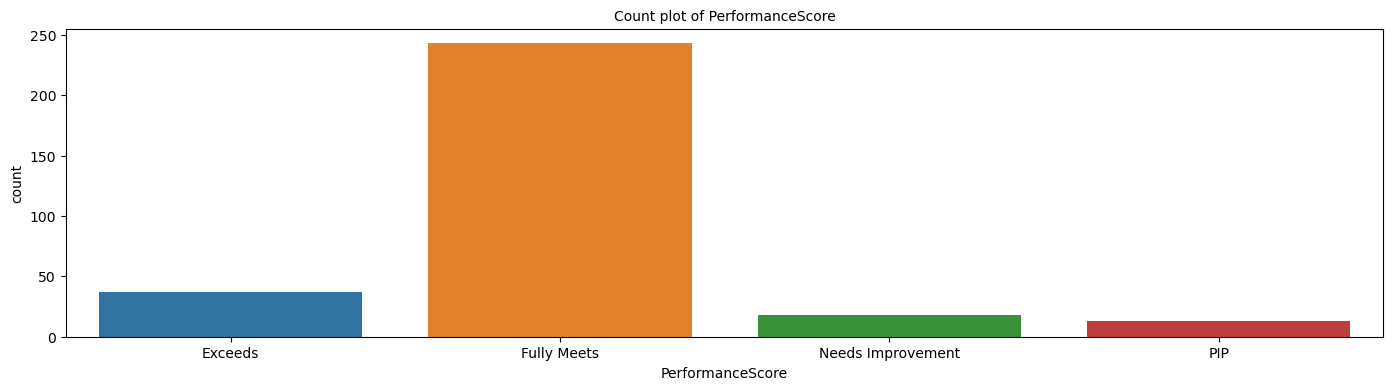

Fully Meets          78.135048
Exceeds              11.897106
Needs Improvement     5.787781
PIP                   4.180064
Name: PerformanceScore, dtype: float64


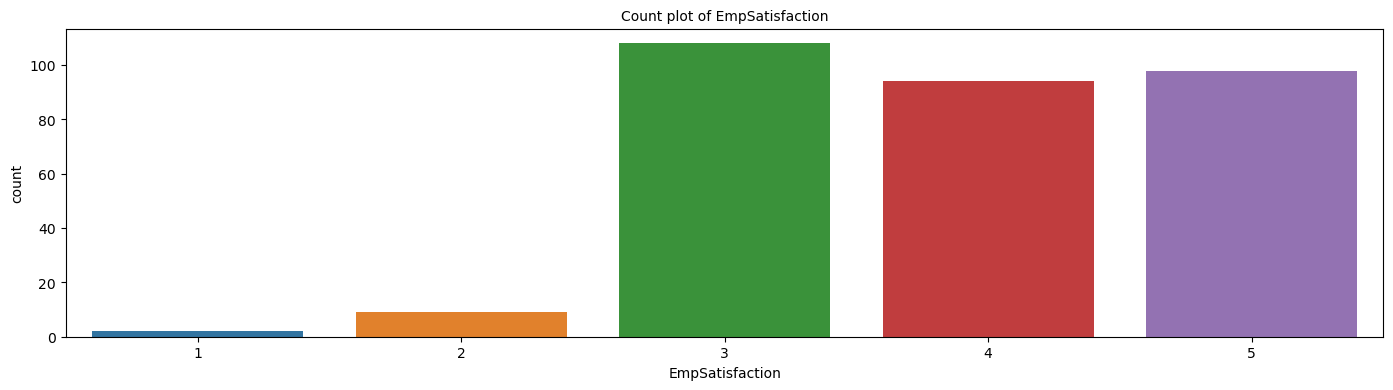

3    34.726688
5    31.511254
4    30.225080
2     2.893891
1     0.643087
Name: EmpSatisfaction, dtype: float64


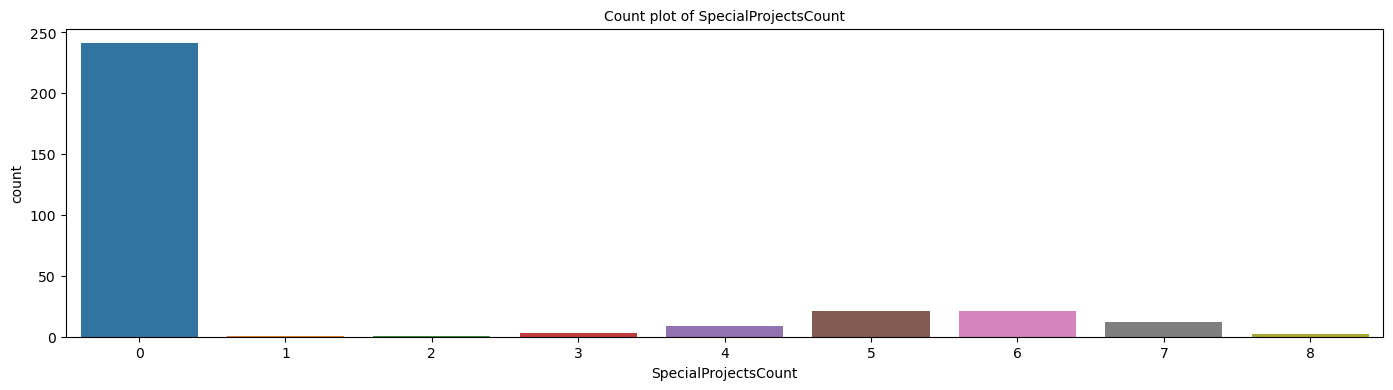

0    77.491961
6     6.752412
5     6.752412
7     3.858521
4     2.893891
3     0.964630
8     0.643087
2     0.321543
1     0.321543
Name: SpecialProjectsCount, dtype: float64


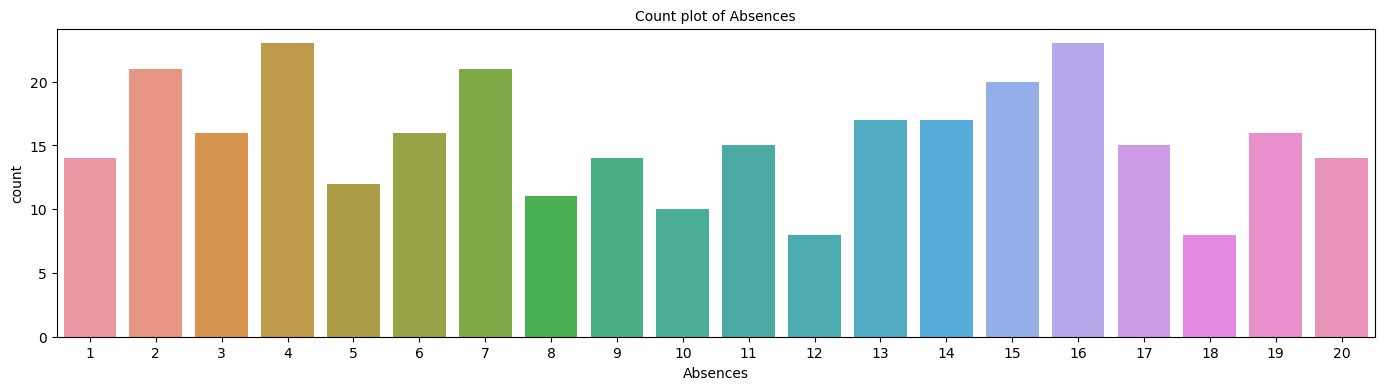

4     7.395498
16    7.395498
7     6.752412
2     6.752412
15    6.430868
13    5.466238
14    5.466238
3     5.144695
19    5.144695
6     5.144695
11    4.823151
17    4.823151
1     4.501608
20    4.501608
9     4.501608
5     3.858521
8     3.536977
10    3.215434
12    2.572347
18    2.572347
Name: Absences, dtype: float64


In [32]:
for i in col:
    plt.figure(figsize = (17, 4))
    target=sns.countplot(x=df[i], data = df)
    total = float(len(df))
    plt.title(f'Count plot of {i}', fontsize=10) 
    plt.show()
    print(df[i].value_counts(normalize=True)*100) 

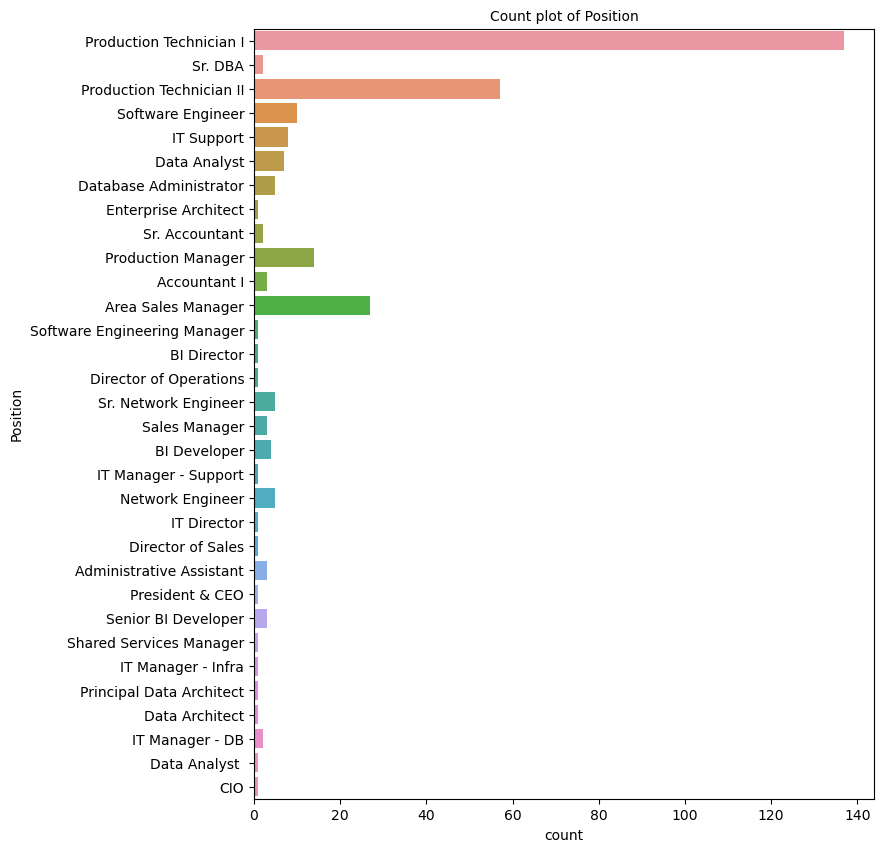

Production Technician I         44.051447
Production Technician II        18.327974
Area Sales Manager               8.681672
Production Manager               4.501608
Software Engineer                3.215434
IT Support                       2.572347
Data Analyst                     2.250804
Sr. Network Engineer             1.607717
Database Administrator           1.607717
Network Engineer                 1.607717
BI Developer                     1.286174
Senior BI Developer              0.964630
Administrative Assistant         0.964630
Sales Manager                    0.964630
Accountant I                     0.964630
Sr. DBA                          0.643087
IT Manager - DB                  0.643087
Sr. Accountant                   0.643087
Director of Operations           0.321543
Shared Services Manager          0.321543
Data Analyst                     0.321543
Data Architect                   0.321543
Principal Data Architect         0.321543
IT Manager - Infra               0

In [33]:
#Count plot of Position
plt.figure(figsize = (8, 10))
target=sns.countplot(y='Position', data = df)
total = float(len(df))
plt.title('Count plot of Position', fontsize=10)
plt.show()
print(df['Position'].value_counts(normalize=True)*100)

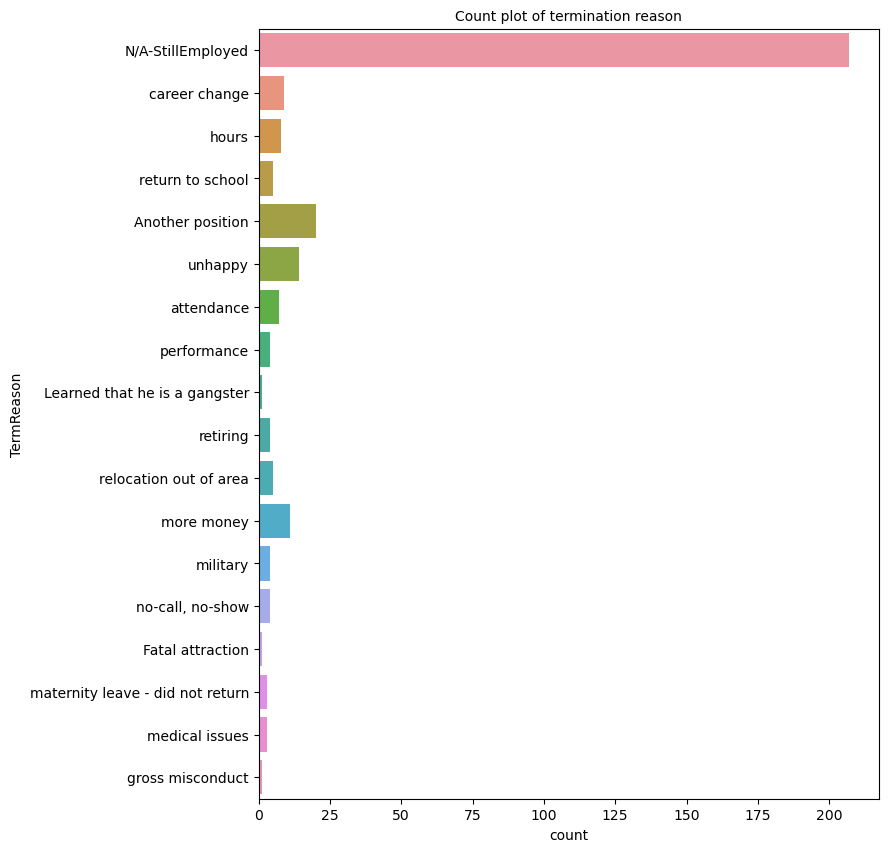

N/A-StillEmployed                   66.559486
Another position                     6.430868
unhappy                              4.501608
more money                           3.536977
career change                        2.893891
hours                                2.572347
attendance                           2.250804
return to school                     1.607717
relocation out of area               1.607717
no-call, no-show                     1.286174
military                             1.286174
retiring                             1.286174
performance                          1.286174
maternity leave - did not return     0.964630
medical issues                       0.964630
Learned that he is a gangster        0.321543
Fatal attraction                     0.321543
gross misconduct                     0.321543
Name: TermReason, dtype: float64


In [34]:
#Count plot of Position
plt.figure(figsize = (8, 10))
target=sns.countplot(y='TermReason', data = df)
total = float(len(df))
plt.title('Count plot of termination reason', fontsize=10)
plt.show()
print(df['TermReason'].value_counts(normalize=True)*100)

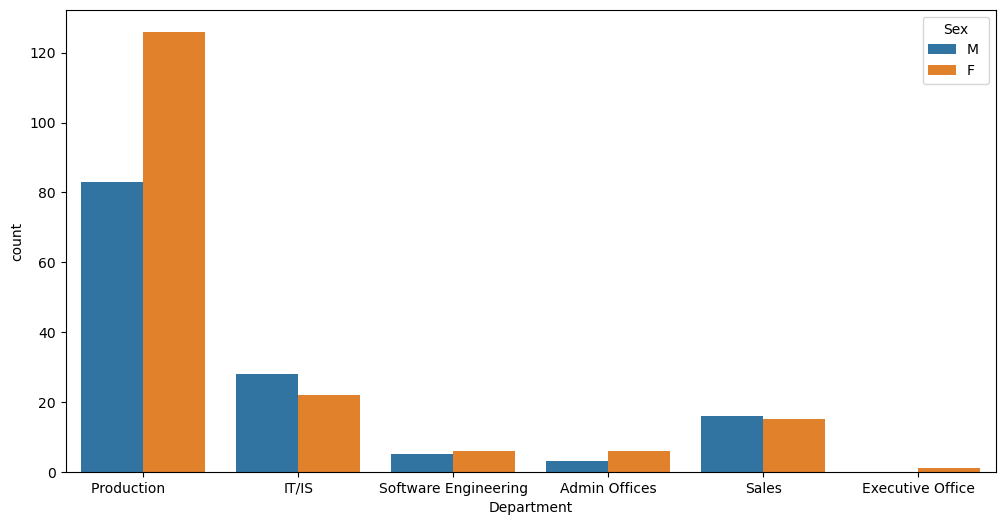

In [35]:
# Gender diversity aross departments

plt.figure(figsize=(12,6))
plot=sns.countplot(x=df['Department'], hue=df['Sex'])

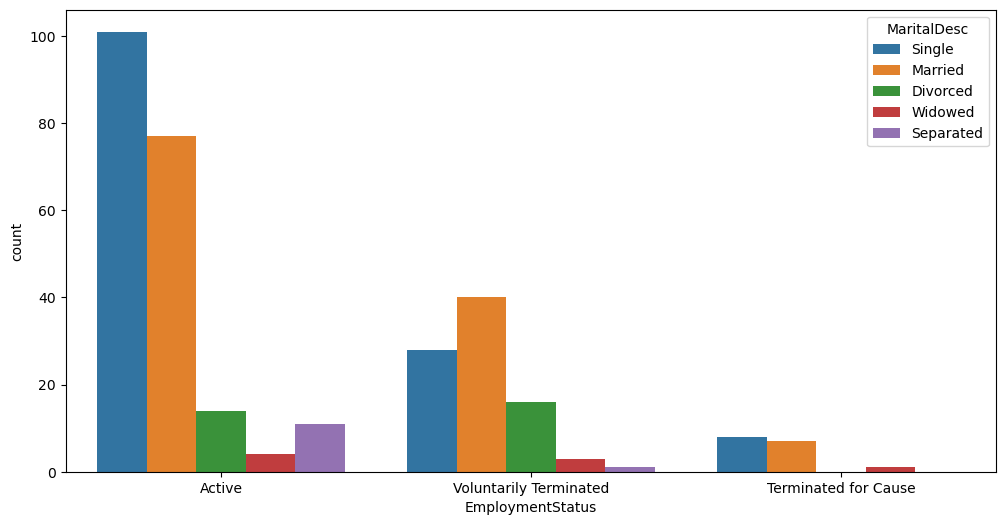

In [36]:
# Employee status against marital status

plt.figure(figsize=(12,6))
plot = sns.countplot(x=df['EmploymentStatus'], hue=df['MaritalDesc'])

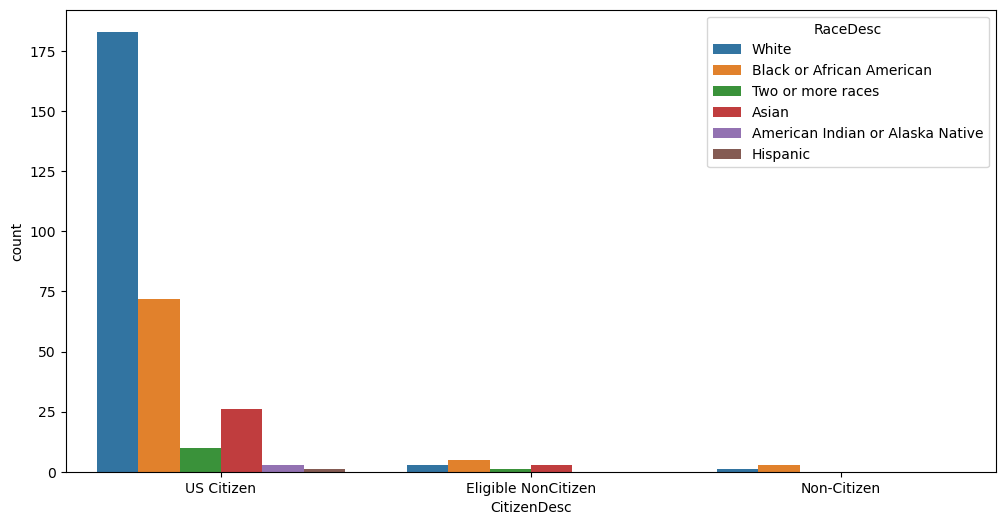

In [37]:
plt.figure(figsize=(12,6))
plot=sns.countplot(x=df['CitizenDesc'],hue=df['RaceDesc'])

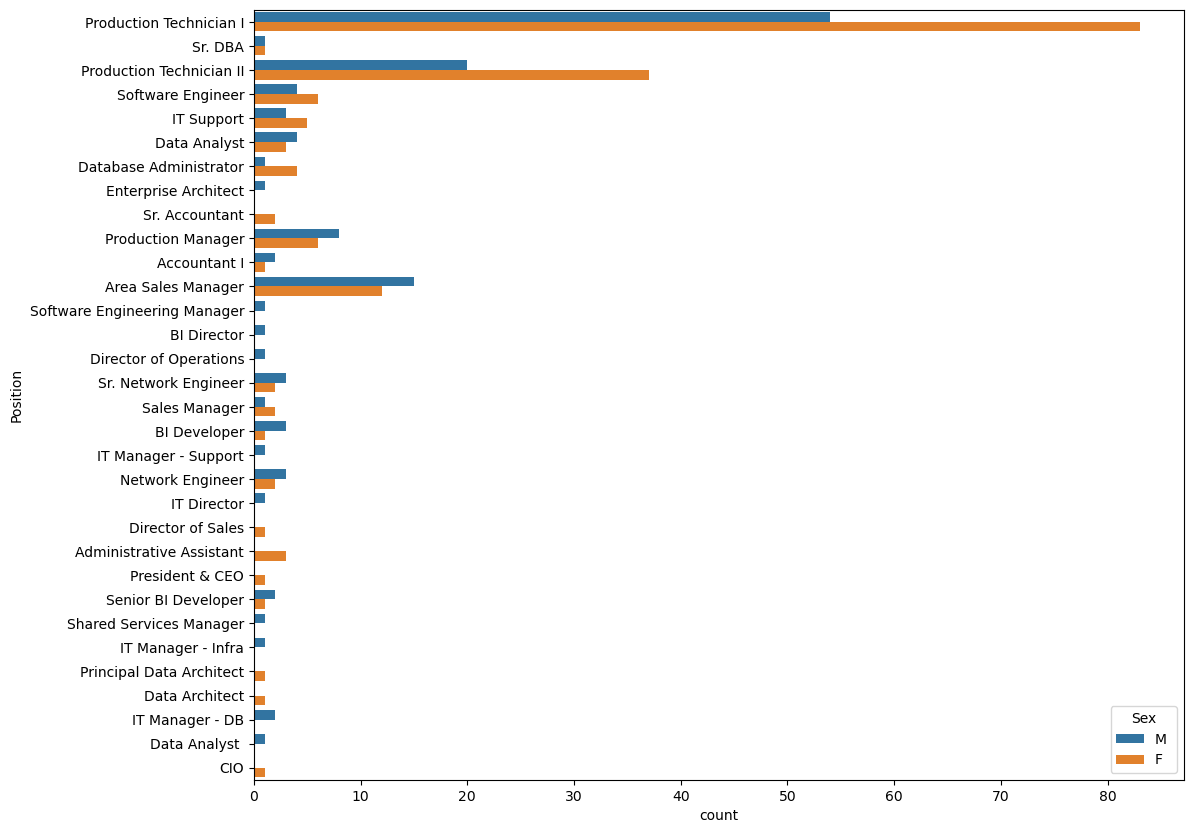

In [38]:
plt.figure(figsize=(12,10))
sns.countplot(y=df['Position'],hue=df['Sex']);

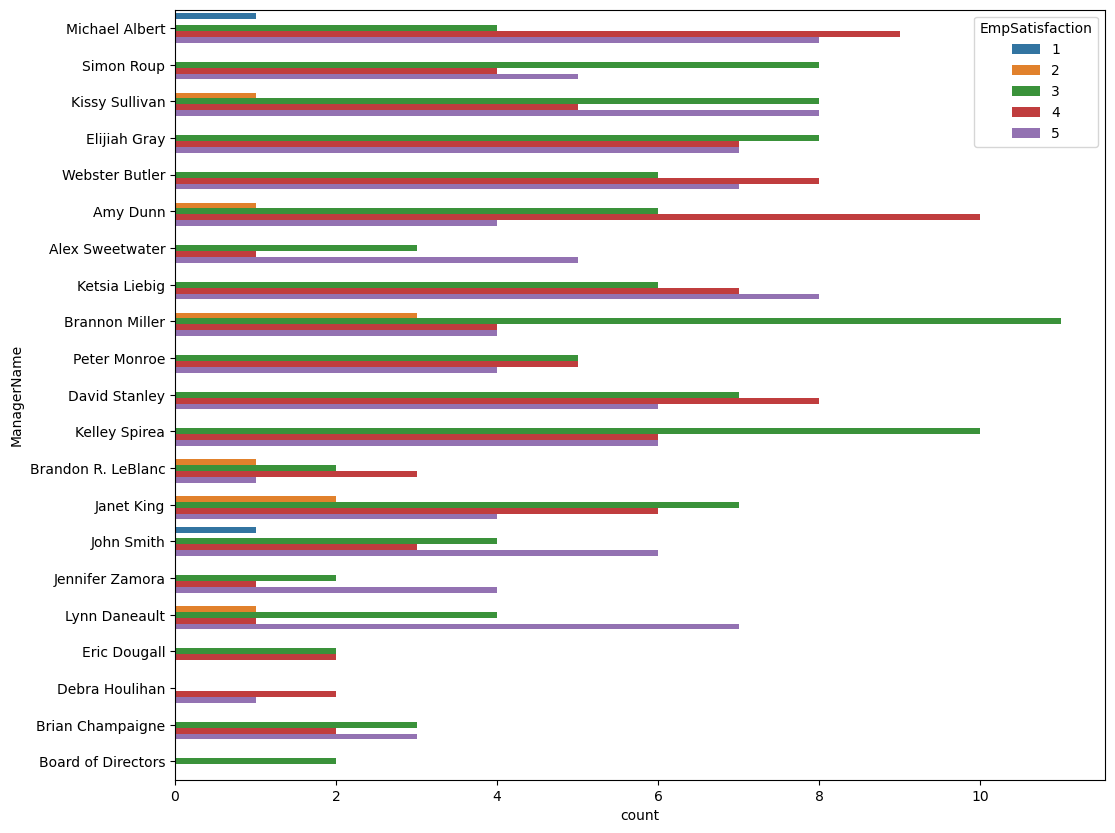

In [39]:
plt.figure(figsize=(12,10))
sns.countplot(y=df['ManagerName'],hue=df['EmpSatisfaction'], data=df);

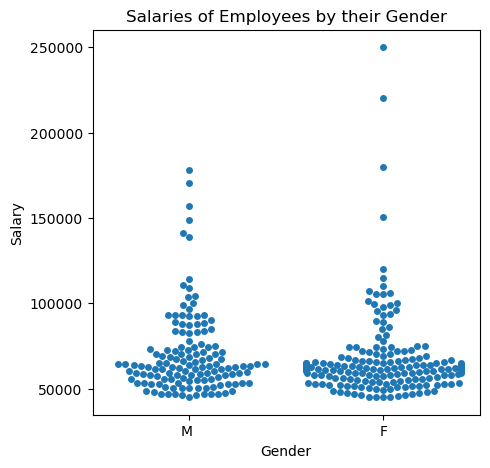

In [40]:
plt.figure(figsize=(5,5))

sns.swarmplot(x="Sex",y="Salary",data=df)

plt.xlabel("Gender")
plt.ylabel("Salary")

plt.title("Salaries of Employees by their Gender")
plt.show()

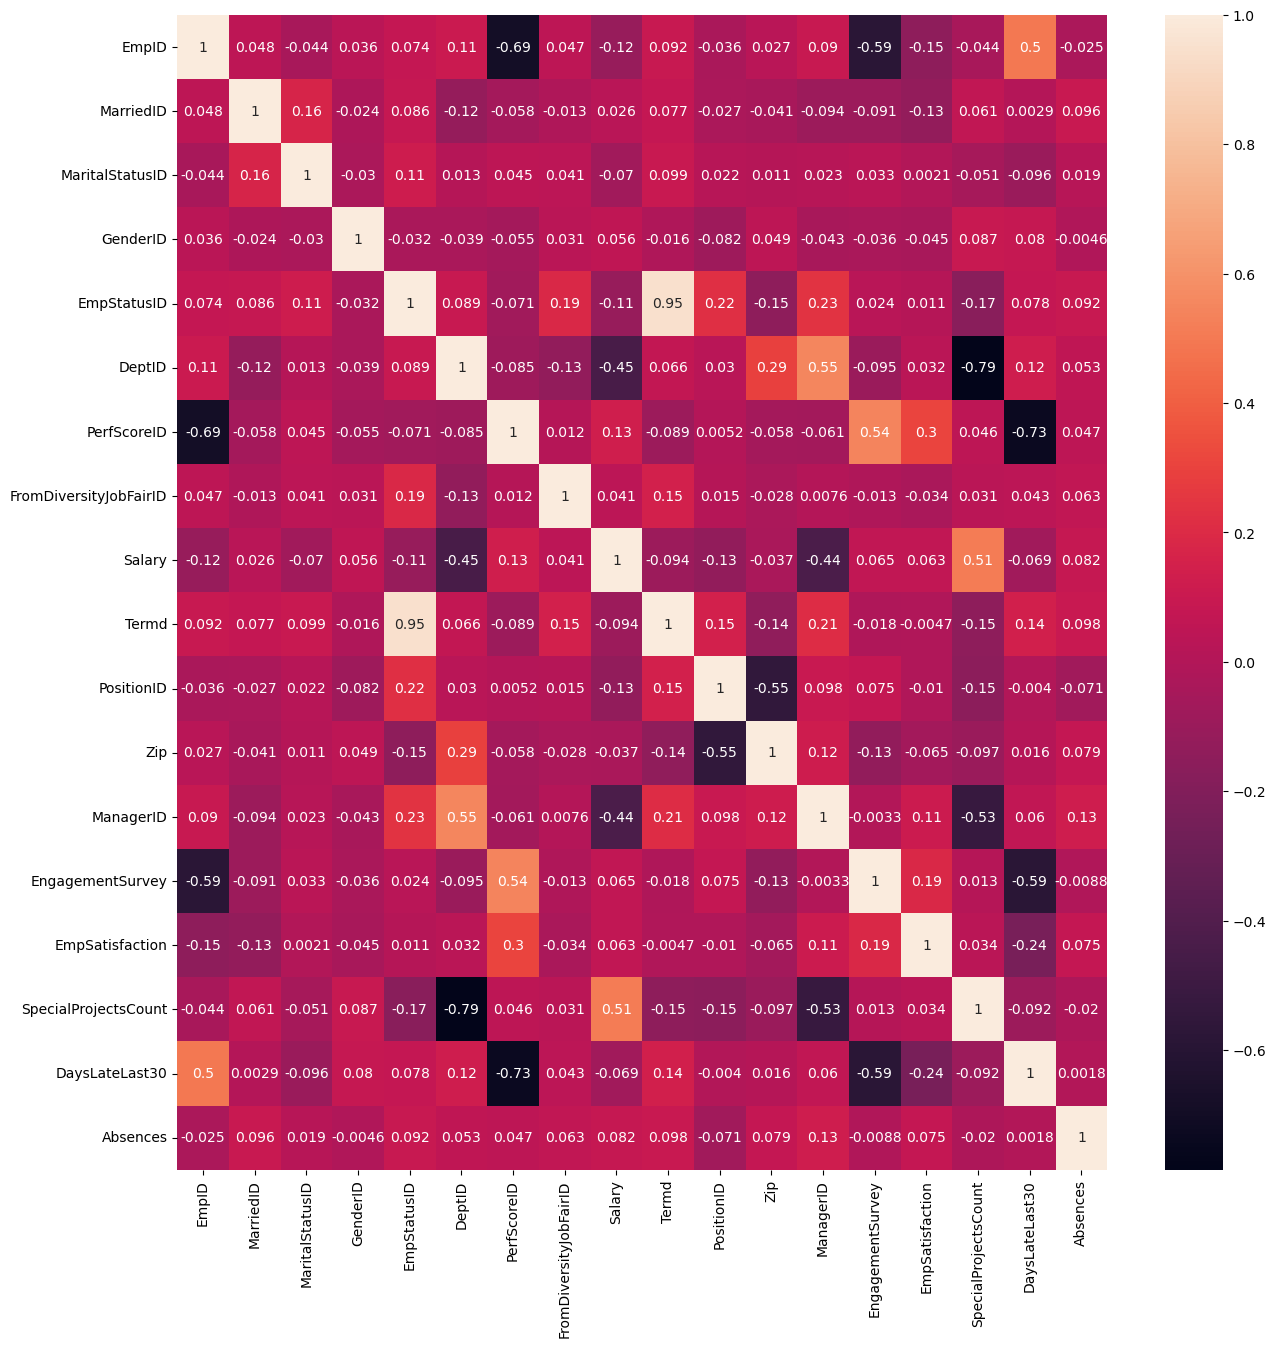

In [41]:
#plotting the heatmap for correlation
plt.figure(figsize=(15,15))
correlationmatrix = sns.heatmap(df.corr(), annot=True)

In [42]:
# Create a new feature experience from the data

df[['DateofHire','DateofTermination','LastPerformanceReview_Date']]

,DateofHire,DateofTermination,LastPerformanceReview_Date
0,2011-07-05,NaT,2019-01-17
1,2015-03-30,2016-06-16,2016-02-24
2,2011-07-05,2012-09-24,2012-05-15
3,2008-01-07,NaT,2019-01-03
4,2011-07-11,2016-09-06,2016-02-01
...,...,...,...
306,2014-07-07,NaT,2019-02-28
307,2008-09-02,2015-09-29,2015-09-02
308,2010-04-10,NaT,2019-02-21
309,2015-03-30,NaT,2019-02-01


In [43]:
df['YearofHire']=df['DateofHire'].apply(lambda x:x.year)
df['Yearoflastperformence']=df['LastPerformanceReview_Date'].apply(lambda x:x.year)

In [44]:
df['YearofHire']

0      2011
1      2015
2      2011
3      2008
4      2011
       ... 
306    2014
307    2008
308    2010
309    2015
310    2014
Name: YearofHire, Length: 311, dtype: int64

In [45]:
df['Yearoflastperformence']

0      2019
1      2016
2      2012
3      2019
4      2016
       ... 
306    2019
307    2015
308    2019
309    2019
310    2019
Name: Yearoflastperformence, Length: 311, dtype: int64

In [46]:
df['Experience']=df['Yearoflastperformence']-df['YearofHire']

In [47]:
df['Experience']

0       8
1       1
2       1
3      11
4       5
       ..
306     5
307     7
308     9
309     4
310     5
Name: Experience, Length: 311, dtype: int64

In [48]:
#From DOB create age feature
# since the last performence year is 2019  we create age substracting it from the yer of birth

In [49]:
df['Yearoflastperformence'].max()

2019

In [50]:
df['Age'] =2019- df['DOB'].apply(lambda x:x.year)

In [51]:
df['Age']

0      36
1      44
2      31
3      31
4      30
       ..
306    34
307    37
308    40
309    40
310    41
Name: Age, Length: 311, dtype: int64

In [52]:
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,YearofHire,Yearoflastperformence,Experience,Age
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,4.60,5,0,2019-01-17,0,1,2011,2019,8,36
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,4.96,3,6,2016-02-24,0,17,2015,2016,1,44
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,3.02,3,0,2012-05-15,0,3,2011,2012,1,31
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,4.84,5,0,2019-01-03,0,15,2008,2019,11,31
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,5.00,4,0,2016-02-01,0,2,2011,2016,5,30


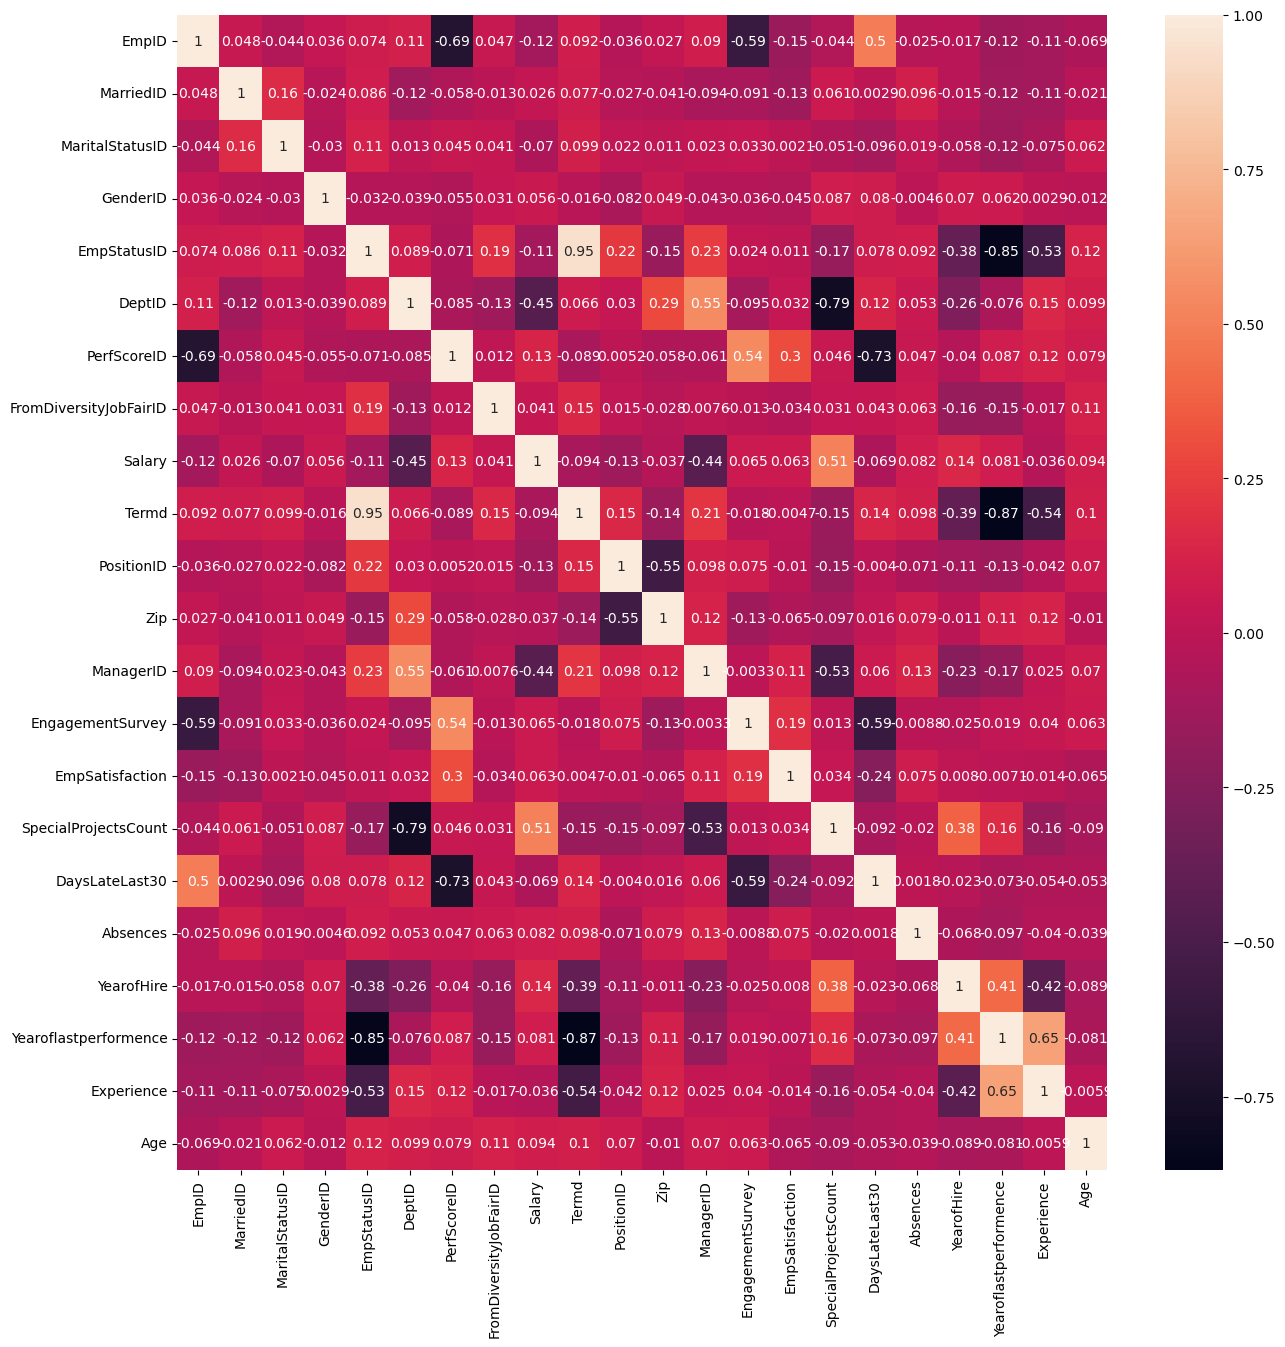

In [53]:
plt.figure(figsize=(15,15))
correlationmatrix = sns.heatmap(df.corr(), annot=True)

## Encoding

In [54]:
df.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences', 'YearofHire', 'Yearoflastperformence', 'Experience', 'Age'],
      dtype='object')

In [55]:
cat_col=list(df.select_dtypes(['object']).columns)

In [56]:
cat_col.remove('Employee_Name')

In [57]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in cat_col:
    df[col] = label_encoder.fit_transform(df[col])
    print(label_encoder.classes_)

['Accountant I' 'Administrative Assistant' 'Area Sales Manager'
 'BI Developer' 'BI Director' 'CIO' 'Data Analyst' 'Data Analyst '
 'Data Architect' 'Database Administrator' 'Director of Operations'
 'Director of Sales' 'Enterprise Architect' 'IT Director'
 'IT Manager - DB' 'IT Manager - Infra' 'IT Manager - Support'
 'IT Support' 'Network Engineer' 'President & CEO'
 'Principal Data Architect' 'Production Manager' 'Production Technician I'
 'Production Technician II' 'Sales Manager' 'Senior BI Developer'
 'Shared Services Manager' 'Software Engineer'
 'Software Engineering Manager' 'Sr. Accountant' 'Sr. DBA'
 'Sr. Network Engineer']
['AL' 'AZ' 'CA' 'CO' 'CT' 'FL' 'GA' 'ID' 'IN' 'KY' 'MA' 'ME' 'MT' 'NC'
 'ND' 'NH' 'NV' 'NY' 'OH' 'OR' 'PA' 'RI' 'TN' 'TX' 'UT' 'VA' 'VT' 'WA']
['F' 'M ']
['Divorced' 'Married' 'Separated' 'Single' 'Widowed']
['Eligible NonCitizen' 'Non-Citizen' 'US Citizen']
['No' 'Yes']
['American Indian or Alaska Native' 'Asian' 'Black or African American'
 'Hispanic' '

In [58]:
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,YearofHire,Yearoflastperformence,Experience,Age
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,4.60,5,0,2019-01-17,0,1,2011,2019,8,36
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,4.96,3,6,2016-02-24,0,17,2015,2016,1,44
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,3.02,3,0,2012-05-15,0,3,2011,2012,1,31
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,4.84,5,0,2019-01-03,0,15,2008,2019,11,31
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,5.00,4,0,2016-02-01,0,2,2011,2016,5,30


## Modeling

In [59]:
# splting od data into target and features
X=df.drop(['Employee_Name','EmpID','DOB','DateofTermination','LastPerformanceReview_Date','ManagerID',
           'YearofHire','Yearoflastperformence','DateofHire'],axis=1)
y=df['Salary']

In [60]:
# Splitting of data into train and split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
#normalizing data
from sklearn import preprocessing
stand=preprocessing.StandardScaler()
X=stand.fit_transform

In [62]:
# Linear regression

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score

In [71]:
lr = LinearRegression()
lin_re=lr.fit(X_train,y_train)
lr_score_train = lr.score(X_train,y_train)
print("Training score: ",lr_score_train)
lr_score_test = lr.score(X_test,y_test)
print("Testing score: ",lr_score_test)

y1_pred = lin_re.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
print('r^2 value of themodel:',r2_score(y_test,y1_pred))

Training score:  1.0
Testing score:  1.0
r^2 value of themodel: 1.0


In [74]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.model_selection import train_test_split
RF_regressor = RandomForestRegressor(n_estimators=300, random_state=5)
lin_re=RF_regressor.fit(X_train,y_train)
print("Training set score: {:.2f}".format(RF_regressor.score(X_train,y_train)))
print("Test set score: {:.2f}".format(RF_regressor.score(X_test,y_test)))

y1_pred = lin_re.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
print('r^2 value of themodel:',r2_score(y_test,y1_pred))
predictedsalary=pd.DataFrame(y1_pred)

Training set score: 0.99
Test set score: 0.94
r^2 value of themodel: 0.942593757359871


In [73]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
pred_dtr = dtr.predict(X_test)
Acc_dtr = dtr.score(X_train, y_train)
acc_dtr = dtr.score(X_test, y_test)
print ('Train Accuracy : {:.2f}%'.format(Acc_dtr*100))
print ('Test Accuracy : {:.2f}%'.format(acc_dtr*100))


from sklearn.metrics import mean_squared_error, r2_score
print('r^2 value of themodel:',r2_score(y_test,y1_pred))

Train Accuracy : 100.00%
Test Accuracy : 95.59%
r^2 value of themodel: 0.942593757359871
